# Goal of project

The goal of this project to predict the marks of students based on the number of hours they study.

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#steps
#1)data collection
#2)Exploratory data analysis
#3)data preprocessing
#4)split the data
#5)train the model
#6)Evaluate the model

# 1.Data Collection

In [2]:
#load datasets
df=pd.read_csv('C:\\Users\\TANUJA PATHAK\\Downloads\\datasets\\student_info.csv')

In [3]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [4]:
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [6]:
df.shape

(200, 2)

# 2.Exploratory Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [8]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


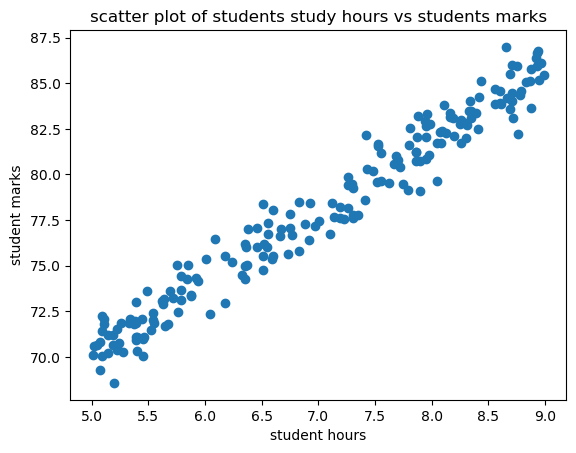

In [9]:
plt.scatter(x=df['study_hours'],y=df['student_marks'])
plt.xlabel('student hours')
plt.ylabel('student marks')
plt.title('scatter plot of students study hours vs students marks')
plt.show()

# 3.Data Preprocessing

Data cleaning

In [11]:
df.isnull()

,study_hours,student_marks
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False
...,...,...
195,False,False
196,False,False
197,False,False
198,False,False


In [12]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [13]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [14]:
df2=df.fillna(df.mean())

In [15]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [16]:
df2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [17]:
df2.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


# 4.Spliiting Data

In [18]:
x=df2.drop('student_marks',axis=1)
y=df2['student_marks']

In [19]:
print(x.shape)
print(y.shape)

(200, 1)
(200,)


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=51)
print('shape of x_train=',x_train.shape)
print('shape of y_train=',y_train.shape)
print('shape of x_test=',x_test.shape)
print('shape of y_test=',y_test.shape)

shape of x_train= (160, 1)
shape of y_train= (160,)
shape of x_test= (40, 1)
shape of y_test= (40,)


# 5.Train the model

In [21]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [22]:
lr.fit(x_train,y_train)

LinearRegression()

In [23]:
lr.coef_

array([3.93571802])

In [24]:
lr.intercept_

50.44735503694244

In [25]:
lr.score(x_test,y_test)

0.9514124242154464

# 6.Evaluate the model

In [27]:
lr.predict([[4]])[0]

C:\Users\TANUJA PATHAK\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


66.19022710353573

In [28]:
y_pred=lr.predict(x_test)

In [29]:
y_pred

array([83.11381458, 78.9025963 , 84.57003024, 85.82946001, 84.72745896,
       80.75238377, 72.84159055, 71.66087515, 73.23516235, 71.66087515,
       73.47130543, 76.38373677, 73.23516235, 73.58937697, 82.95638585,
       70.40144538, 73.23516235, 78.74516758, 75.55723598, 82.68088559,
       76.65923703, 70.48015974, 74.77009238, 77.98143645, 85.59331693,
       82.56281405, 76.42309395, 85.0423164 , 78.39095296, 81.38209865,
       81.73631327, 83.15317176, 82.20859943, 81.10659839, 73.58937697,
       71.1492318 , 71.89701823, 81.53952737, 72.60544747, 71.93637541])

In [30]:
y_test

148    82.02
104    77.55
4      84.19
7      85.46
192    84.03
160    80.81
118    73.61
58     70.90
190    73.14
174    73.02
23     75.02
10     75.37
115    74.44
86     73.40
67     81.70
68     69.27
177    73.64
171    77.63
128    77.01
14     83.08
82     76.63
50     72.22
45     72.96
31     76.14
176    85.96
21     83.36
198    78.05
89     84.60
35     76.76
36     81.24
113    80.86
121    82.69
99     82.30
162    79.17
79     73.34
131    71.86
65     70.06
13     80.76
85     72.87
42     71.10
Name: student_marks, dtype: float64

In [31]:
lr.score(x_test,y_test)

0.9514124242154464

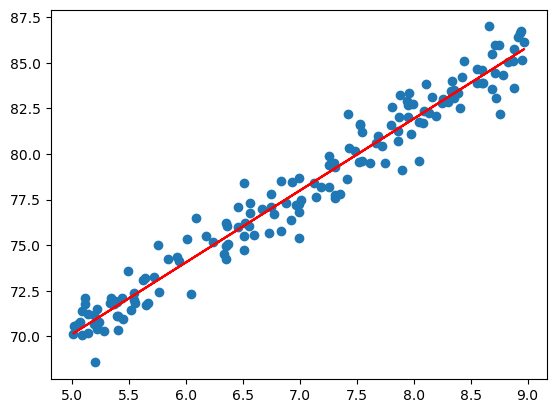

In [33]:
plt.scatter(x_train,y_train)
plt.plot(x_train,lr.predict(x_train),color='r')

# Save model

In [34]:
import joblib
joblib.dump(lr,'student_marks_predictor_model.pkl')

['student_marks_predictor_model.pkl']

In [35]:
model=joblib.load('student_marks_predictor_model.pkl')

In [36]:
model.predict([[5]])[0]

C:\Users\TANUJA PATHAK\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


70.12594512018406

# Accuracy=95%